In [116]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df=pd.read_csv('Student_Performance.csv')
print(df.head)
print(df.tail)

<bound method NDFrame.head of       Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sam

In [118]:
print(df.columns)
print(df.dtypes)

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')
Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object


In [119]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [120]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Extracurricular Activities']=label.fit_transform(df['Extracurricular Activities'])
df['Extracurricular Activities'].unique()

array([1, 0])

Text(0.5, 1.0, 'Performance')

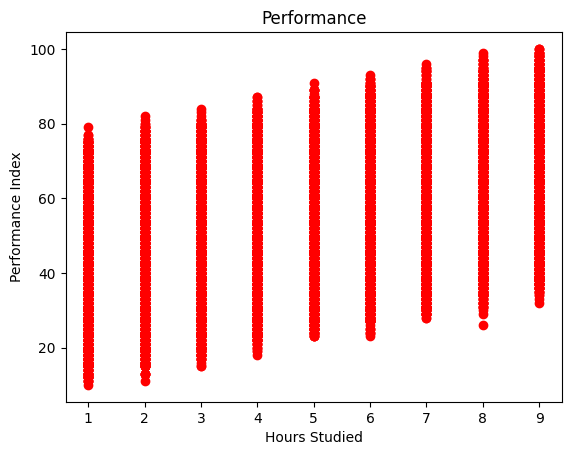

In [121]:
plt.scatter(df['Hours Studied'],df['Performance Index'], color='r')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Performance')

Text(0.5, 1.0, 'Performance')

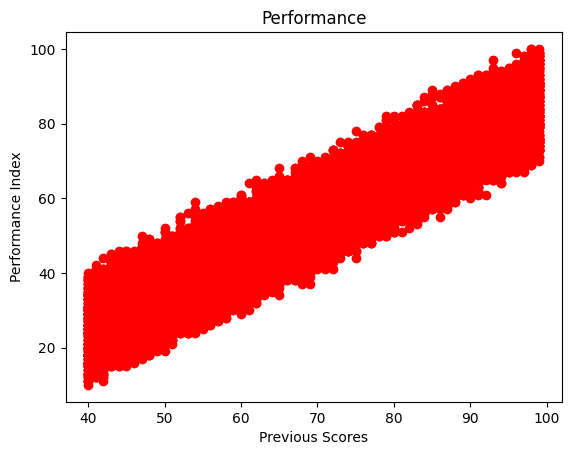

In [122]:
plt.scatter(df['Previous Scores'],df['Performance Index'], color='r')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Performance')

Text(0.5, 1.0, 'Performance')

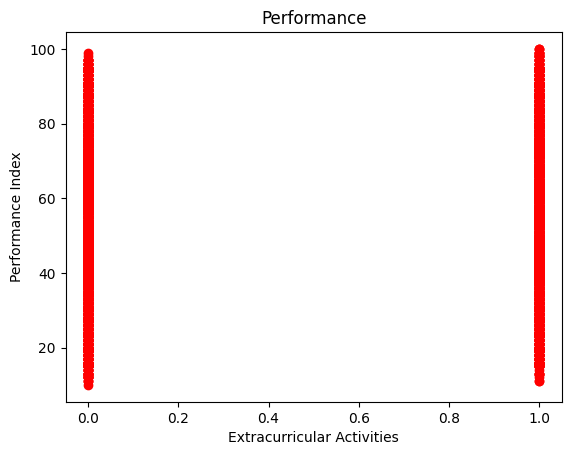

In [123]:
plt.scatter(df['Extracurricular Activities'],df['Performance Index'], color='r')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Performance Index')
plt.title('Performance')

Text(0.5, 1.0, 'Performance')

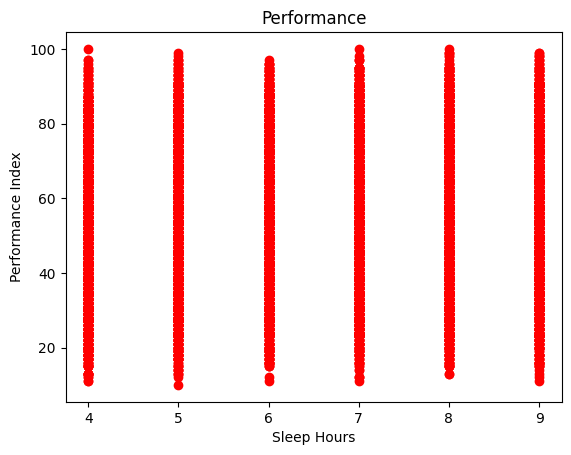

In [124]:
plt.scatter(df['Sleep Hours'],df['Performance Index'], color='r')
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.title('Performance')

Text(0.5, 1.0, 'Performance')

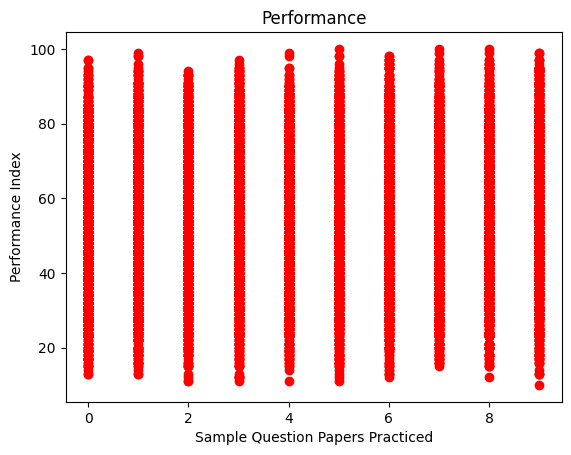

In [125]:
plt.scatter(df['Sample Question Papers Practiced'],df['Performance Index'], color='r')
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.title('Performance')

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

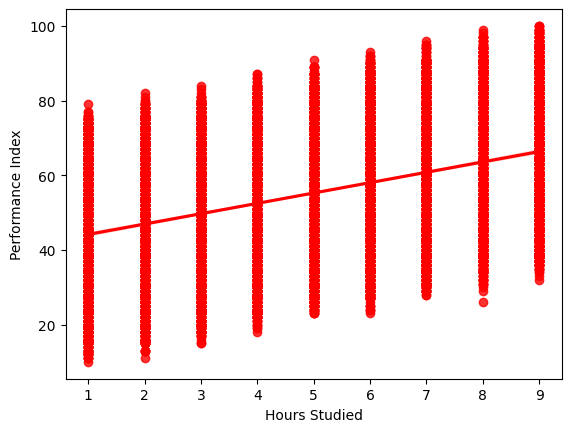

In [126]:
y=df['Performance Index']
sns.regplot(x=df['Hours Studied'],y=y,color='r')

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

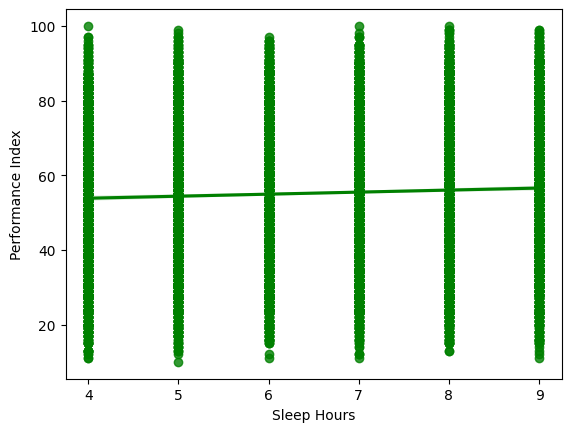

In [127]:
sns.regplot(x=df['Sleep Hours'],y=y,color='g')

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

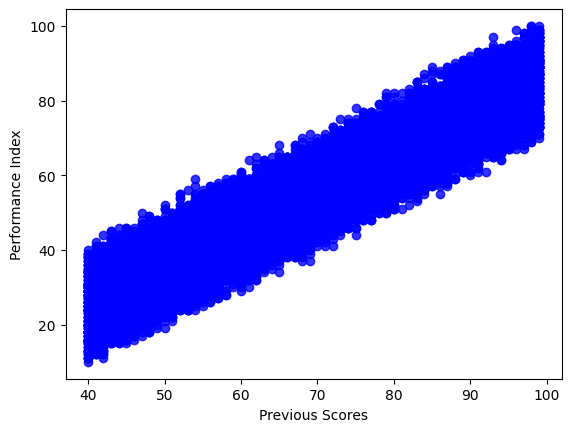

In [128]:
sns.regplot(x=df['Previous Scores'],y=y,color='b')

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

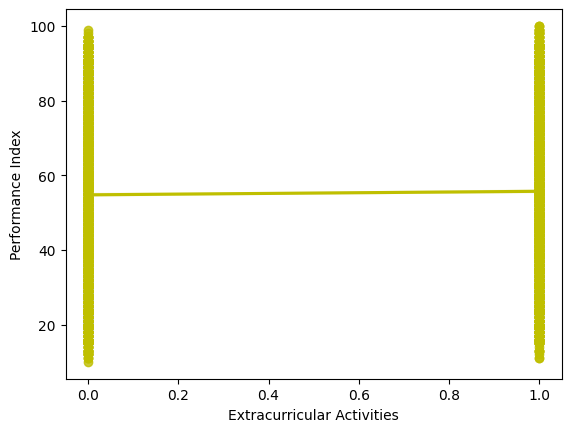

In [129]:
sns.regplot(x=df['Extracurricular Activities'],y=y,color='y')

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

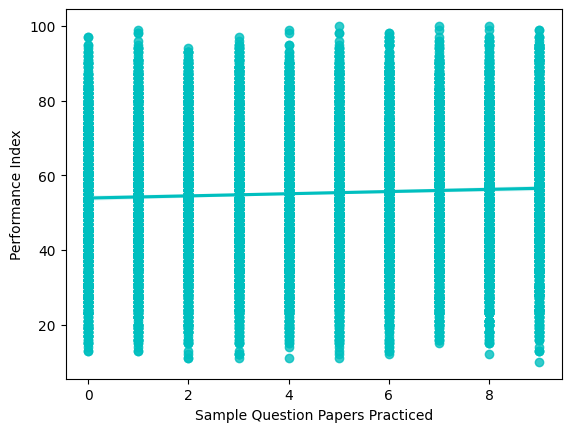

In [130]:
sns.regplot(x=df['Sample Question Papers Practiced'],y=y,color='c')

In [131]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [132]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [133]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([50.46443613, 53.10077726, 78.27207629, ..., 61.92684246,
       39.15895897, 89.59303935], shape=(3000,))

In [134]:
print("Slope is",list(zip(x,model.coef_)))

Slope is [('Hours Studied', np.float64(2.8495799612819726)), ('Previous Scores', np.float64(1.0194169852885921)), ('Extracurricular Activities', np.float64(0.6217869361331486)), ('Sleep Hours', np.float64(0.4742622254731802)), ('Sample Question Papers Practiced', np.float64(0.18631282628278095))]


In [135]:
print("Constant is",model.intercept_)

Constant is -34.06212023657083


In [136]:
df1=pd.DataFrame({'Actual_Value':y_test,'Predicted_Value':y_pred,'Difference':y_test-y_pred})
df1

,Actual_Value,Predicted_Value,Difference
9394,53.0,50.464436,2.535564
898,50.0,53.100777,-3.100777
2398,80.0,78.272076,1.727924
5906,24.0,25.362963,-1.362963
2343,64.0,67.432695,-3.432695
...,...,...,...
4004,73.0,69.639832,3.360168
7375,31.0,30.661211,0.338789
9307,62.0,61.926842,0.073158
8394,39.0,39.158959,-0.158959


In [137]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test,y_pred)
MAE

1.595095445716298

In [138]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE=mean_absolute_percentage_error(y_test,y_pred)
MAPE

0.034104756044772665

In [139]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,y_pred)
MSE

4.039519191698855

In [140]:
from sklearn.metrics import root_mean_squared_error
RMSE=root_mean_squared_error(y_test,y_pred)
RMSE

2.009855515130094

In [141]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9888065859708454

In [142]:
print(model.predict([[8,73,1,8,5]]))

[68.49940825]


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
